Simple Linear Model

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

fname = "placement.csv"

# search current directory and parent directories for the file
matches = []
for root in [Path(".")] + list(Path.cwd().parents):
	matches.extend(list(root.rglob(fname)))

if matches:
	path = matches[0]
	print(f"Found file at: {path}")
	dataset = pd.read_csv(path)
	print(dataset.head(10))
else:
	print(f"File '{fname}' not found. Checked current and parent directories.")

Found file at: c:\Users\Noman Traders\Documents\GitHub\ml-daily-journal\datasets\placement.csv
   cgpa  package
0  6.89     3.26
1  5.12     1.98
2  7.82     3.25
3  7.42     3.67
4  6.94     3.57
5  7.89     2.99
6  6.73     2.60
7  6.75     2.48
8  6.09     2.31
9  8.31     3.51


In [2]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split

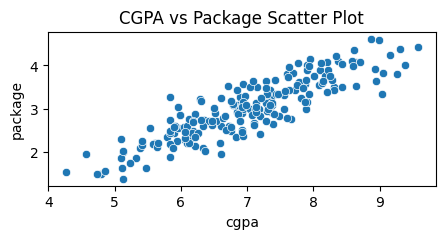

In [3]:
plt.figure(figsize=(5, 2))
sns.scatterplot(data=dataset, x='cgpa', y='package')
plt.title('CGPA vs Package Scatter Plot')
plt.show()

In [4]:
dataset.shape

(200, 2)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [6]:
dataset.isnull().sum()

cgpa       0
package    0
dtype: int64

In [7]:
x = dataset[['cgpa']]
y = dataset['package']

In [8]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
import sklearn.linear_model 
from sklearn.linear_model import	LinearRegression

In [10]:
lr = LinearRegression()
lr.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [11]:
# y=m*x + c

In [12]:
m	= lr.coef_
c	= lr.intercept_
print(f"Slope (m): {m[0]}, Intercept (c): {c}")

Slope (m): 0.5742564727019197, Intercept (c): -1.0270069374542108


In [13]:
# y = 0.5742564727019197 * x -1.0270069374542108

In [14]:
import numpy as np

# pass a 2D array (n_samples, n_features)
sample = np.array([[6.89]])
lr.predict(sample)

c:\Users\Noman Traders\Documents\GitHub\ml-daily-journal\ml-env\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.92962016])

In [15]:
y = 0.5742564727019197 * 6.89 -1.0270069374542108
y

2.929620159462016

In [16]:
lr.score(x_test, y_test)

0.7730984312051673

In [17]:
y_pred = lr.predict(x)


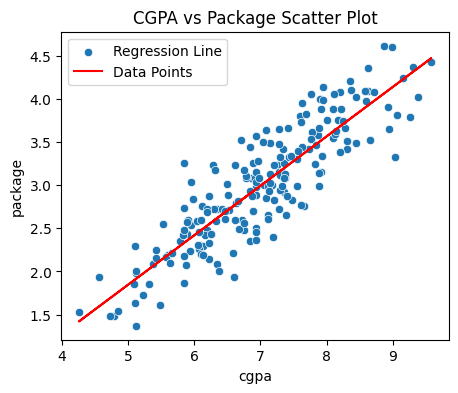

In [18]:
plt.figure(figsize=(5, 4))
sns.scatterplot(data=dataset, x='cgpa', y='package')
plt.title('CGPA vs Package Scatter Plot')
plt.plot(x, y_pred, color='red')
plt.legend(['Regression Line', 'Data Points'])
plt.show()